In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
# from google.colab import drive
# drive.mount('/content/drive')

In [12]:
# read excel file imposters 2000 MFCs 4grams
validation_imposters_results_cosine_delta = pd.read_excel(
    "../results/results_imposters_valid_cosine_delta.xlsx")

In [13]:
validation_imposters_results_cosine_delta

document            author attributed_author    p1    p2  \
0       luc_phars_1.txt             lucan             lucan  0.35  0.64   
1      luc_phars_10.txt             lucan             lucan  0.35  0.64   
2       luc_phars_2.txt             lucan             lucan  0.35  0.64   
3       luc_phars_3.txt             lucan             lucan  0.35  0.64   
4       luc_phars_4.txt             lucan             lucan  0.35  0.64   
..                  ...               ...               ...   ...   ...   
83  valflac_argon_4.txt  valerius flaccus  valerius flaccus  0.35  0.64   
84  valflac_argon_5.txt  valerius flaccus  valerius flaccus  0.35  0.64   
85  valflac_argon_6.txt  valerius flaccus  valerius flaccus  0.35  0.64   
86  valflac_argon_7.txt  valerius flaccus  valerius flaccus  0.35  0.64   
87  valflac_argon_8.txt  valerius flaccus  valerius flaccus  0.35  0.64   

    result  
0     1.00  
1     1.00  
2     1.00  
3     1.00  
4     1.00  
..     ...  
83    1.00  
84    1.00  
85    0.99  
86    1.00  
87    1.00  

[88 rows x 6 columns]

In [14]:
# the lists of true authors and predicted authors
true_authors = validation_imposters_results_cosine_delta['author'].str.title()
predicted_authors = validation_imposters_results_cosine_delta[
    'attributed_author'].str.title()

class_names = sorted(true_authors.unique())
class_names

['Lucan',
 'Manilius',
 'Ovid',
 'Persius',
 'Phaedrus',
 'Seneca',
 'Silius Italicus',
 'Statius',
 'Valerius Flaccus']

## Confusion Matrix

In [15]:
# set context to talk
sns.set_palette('colorblind')

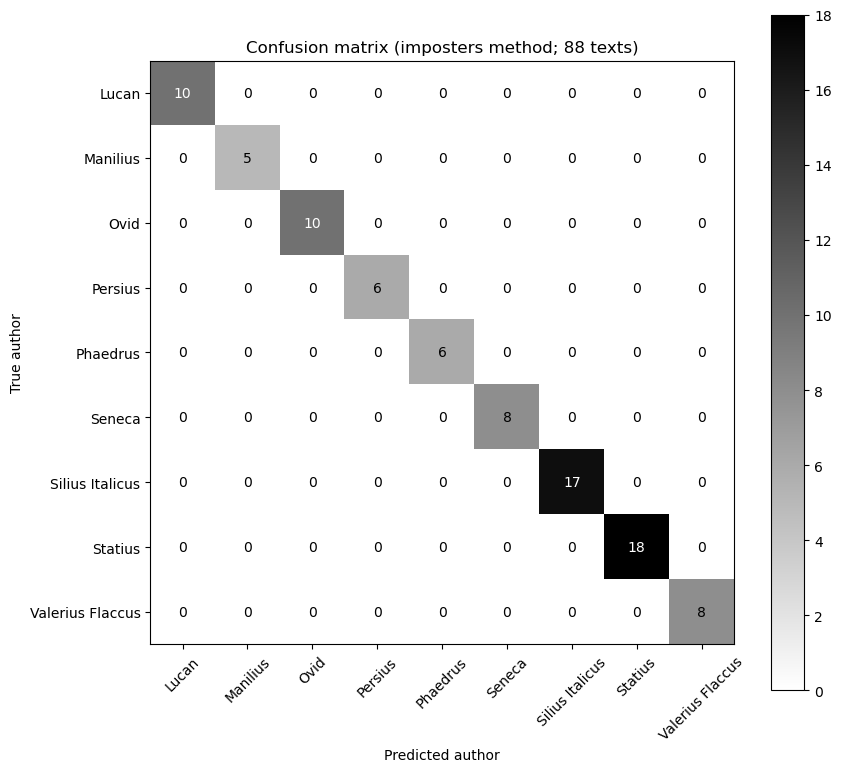

In [16]:
# Based on https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
disp = metrics.ConfusionMatrixDisplay.from_predictions(
    true_authors,
    predicted_authors,
    cmap='binary',
    xticks_rotation=45,
    normalize=None # pred: positive predictive value (i.e., precision)
)
disp.ax_.set_title('Confusion matrix (imposters method; 88 texts)')
disp.ax_.set(xlabel='Predicted author', ylabel='True author')

fig = disp.figure_
fig.set_figwidth(9)
fig.set_figheight(8)

# save figure
plt.tight_layout()
plt.savefig('../results/conf_matrix_eval_imposters_verse_corpus_cosdelta.pdf', dpi=500)
plt.show()

In [17]:
# Double-check with different method:
pd.crosstab(true_authors, predicted_authors)

attributed_author  Lucan  Manilius  Ovid  Persius  Phaedrus  Seneca  \
author                                                                
Lucan                 10         0     0        0         0       0   
Manilius               0         5     0        0         0       0   
Ovid                   0         0    10        0         0       0   
Persius                0         0     0        6         0       0   
Phaedrus               0         0     0        0         6       0   
Seneca                 0         0     0        0         0       8   
Silius Italicus        0         0     0        0         0       0   
Statius                0         0     0        0         0       0   
Valerius Flaccus       0         0     0        0         0       0   

attributed_author  Silius Italicus  Statius  Valerius Flaccus  
author                                                         
Lucan                            0        0                 0  
Manilius                         0        0                 0  
Ovid                             0        0                 0  
Persius                          0        0                 0  
Phaedrus                         0        0                 0  
Seneca                           0        0                 0  
Silius Italicus                 17        0                 0  
Statius                          0       18                 0  
Valerius Flaccus                 0        0                 8

## Classification scores (accuracy, f-scores)

In [18]:
print(
    metrics.classification_report(true_authors,
                                  predicted_authors,
                                  zero_division=0,
                                  digits=2))

                  precision    recall  f1-score   support

           Lucan       1.00      1.00      1.00        10
        Manilius       1.00      1.00      1.00         5
            Ovid       1.00      1.00      1.00        10
         Persius       1.00      1.00      1.00         6
        Phaedrus       1.00      1.00      1.00         6
          Seneca       1.00      1.00      1.00         8
 Silius Italicus       1.00      1.00      1.00        17
         Statius       1.00      1.00      1.00        18
Valerius Flaccus       1.00      1.00      1.00         8

        accuracy                           1.00        88
       macro avg       1.00      1.00      1.00        88
    weighted avg       1.00      1.00      1.00        88

